In [23]:
!pip install scikit-learn matplotlib seaborn --quiet

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [25]:
digits = datasets.load_digits()

In [26]:
print("Shape of image data:", digits.images.shape)


Shape of image data: (1797, 8, 8)


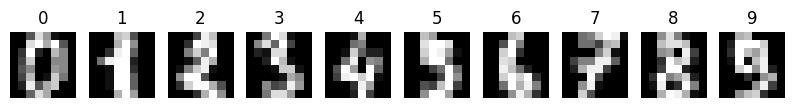

In [27]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()


In [28]:
X = digits.images.reshape((len(digits.images), -1))
y = digits.target


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
model = SVC(kernel='rbf', gamma=0.05, C=10)
model.fit(X_train, y_train)


SVC(C=10, gamma=0.05)

In [33]:
y_pred = model.predict(X_test)


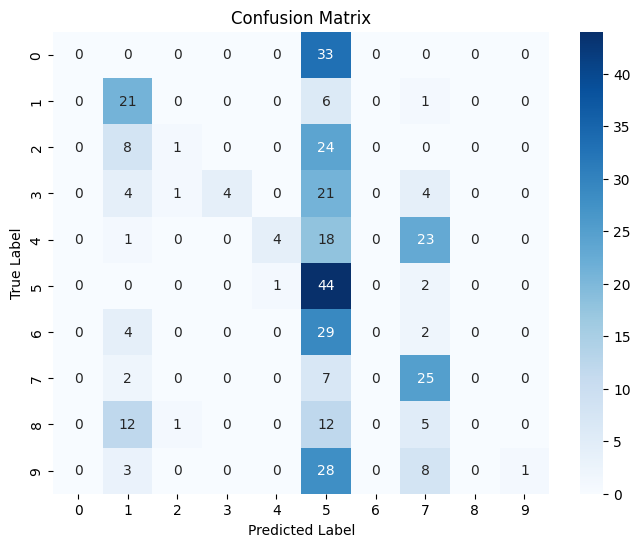

In [22]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


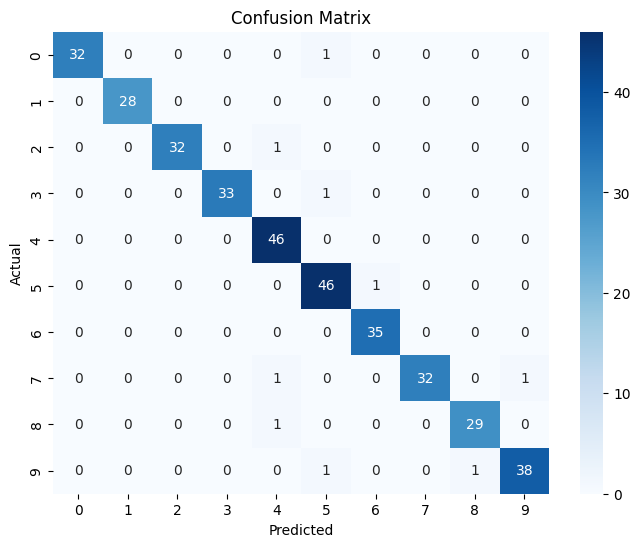

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()